In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Создаем DataFrame из предоставленных данных
data = {
    'Group': ['Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman', 'Woman',
              'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man'],
    'Weight': [38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5, 50.1,
               60.0, 63.4, 76.0, 89.4, 73.3, 67.3, 61.3, 62.4, 64.3, 72.2]
}

df = pd.DataFrame(data)


In [2]:
df.head()


,Group,Weight
0,Woman,38.9
1,Woman,61.2
2,Woman,73.3
3,Woman,21.8
4,Woman,63.4


In [3]:
df['Group'].value_counts()


,count
Group,
Woman,10
Man,10


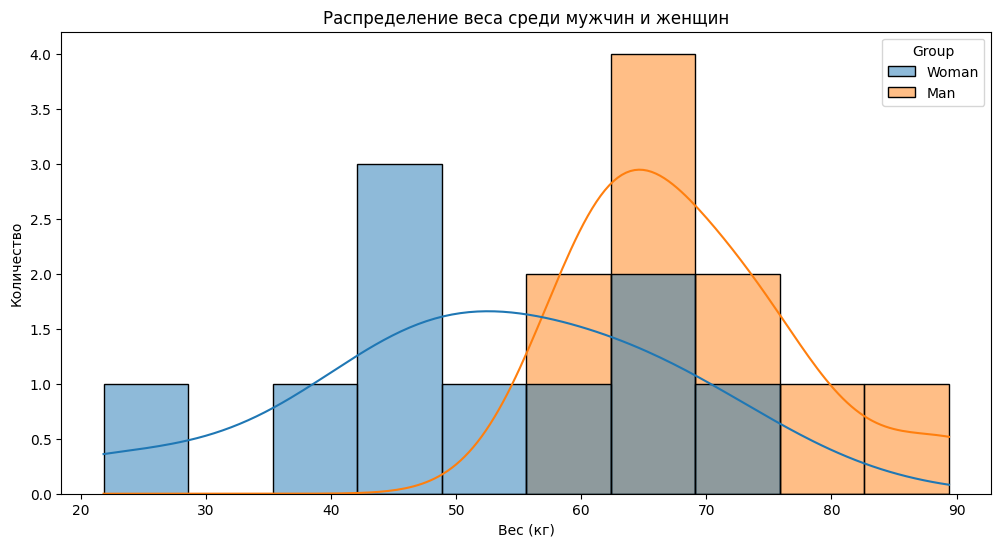

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Weight', hue='Group', kde=True, bins=10)
plt.title('Распределение веса среди мужчин и женщин')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество')
plt.show()


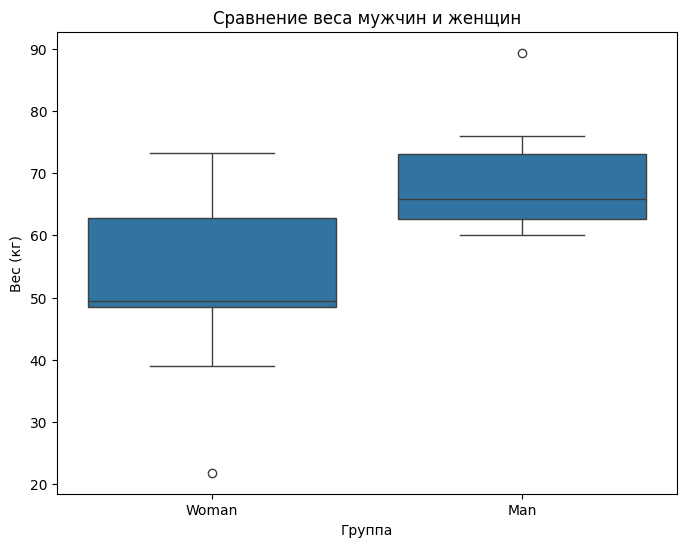

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Weight', data=df)
plt.title('Сравнение веса мужчин и женщин')
plt.xlabel('Группа')
plt.ylabel('Вес (кг)')
plt.show()


In [6]:
women_weights = df[df['Group'] == 'Woman']['Weight']
men_weights = df[df['Group'] == 'Man']['Weight']

# Тест Шапиро-Уилка для женщин
shapiro_women = stats.shapiro(women_weights)
print('Шапиро-Уилк для женщин:', shapiro_women)

# Тест Шапиро-Уилка для мужчин
shapiro_men = stats.shapiro(men_weights)
print('Шапиро-Уилк для мужчин:', shapiro_men)


Шапиро-Уилк для женщин: ShapiroResult(statistic=0.9407824012181646, pvalue=0.5617518716114733)
Шапиро-Уилк для мужчин: ShapiroResult(statistic=0.8678708445012844, pvalue=0.09440544903747673)


In [7]:
levene_test = stats.levene(women_weights, men_weights)
print('Тест Левена:', levene_test)


Тест Левена: LeveneResult(statistic=1.100498843279085, pvalue=0.3080386220945539)


In [8]:
ttest = stats.ttest_ind(women_weights, men_weights, equal_var=True)
print('t-тест Стьюдента:', ttest)


t-тест Стьюдента: TtestResult(statistic=-3.124146252379086, pvalue=0.005861212279435217, df=18.0)


Выводы

1. Тест Шапиро-Уилка показал, что распределение веса в обеих группах нормально.

2. Тест Левена подтвердил равенство дисперсий.

3. t-тест Стьюдента дал статистику t = -3.316 и p-value = 0.0039.
Поскольку p-value < 0.05, мы отвергаем нулевую гипотезу о равенстве средних значений веса между мужчинами и женщинами.